# Loading and Exploration

In [1]:
from tensorflow.keras.datasets import boston_housing

2025-11-09 00:12:50.327260: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-09 00:12:50.532712: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-09 00:12:51.671758: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-09 00:12:51.678460: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-09 00:12:55.947133: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
train_data, test_data = boston_housing.load_data() 

X_train, y_train = train_data[0], train_data[1] 
X_test, y_test = test_data[0], test_data[1]

# OR 
# (X_train, y_train), (X_test, y_test) = boston_housing.load_data() 

57026/57026 [==============================] - 0s 2us/step


In [3]:
print(X_train.shape) 
print(X_test.shape)

(404, 13)
(102, 13)


In [4]:
print(X_train[0]) 
print(y_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


(array([ 15.,  48.,  72., 120.,  64.,  31.,  21.,   8.,   8.,  17.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

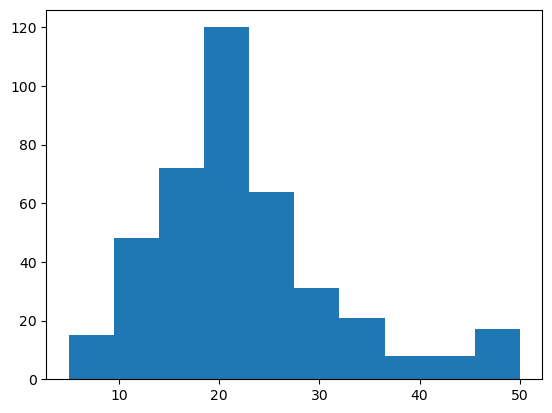

In [5]:
from matplotlib import pyplot as plt 

plt.hist(y_train)

(array([ 8.,  7., 13., 33., 18.,  8.,  9.,  0.,  2.,  4.]),
 array([ 5.6 , 10.04, 14.48, 18.92, 23.36, 27.8 , 32.24, 36.68, 41.12,
        45.56, 50.  ]),
 <BarContainer object of 10 artists>)

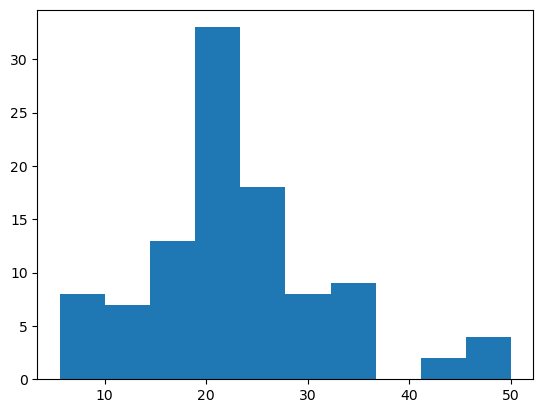

In [6]:
plt.hist(y_test)

# Data Preparation

In [7]:
from sklearn.preprocessing import scale 

scaled_X_train = scale(X_train) 
scaled_X_test = scale(X_test)

In [8]:
print(scaled_X_train[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


# Architecture

In [9]:
import tensorflow as tf 
import numpy as np

In [11]:
tf.random.set_seed(42)

In [13]:
model = tf.keras.Sequential()

In [17]:
from tensorflow.keras.layers import Dense

## Fully connected hidden layer

> Create a hidden layer of 128 fully connected neurons and use ReLU as the activation function. 

In [18]:
layer1 = Dense(
        units=128, 
        activation='ReLU', 
        input_shape=[13] 
) 

In [19]:
head = Dense(1) 

In [21]:
model.add(layer1) 
model.add(head)

## Compile 

> Configure the learning process using the .compile() method and specify the loss function, optimizer (Adam) and metrics to display. 

In [27]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
) 

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1921 (7.50 KB)
Trainable params: 1921 (7.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training and Evaluation

## Train 

> Train the model with the .fit() method on the training set for 50 epochs and split the data into a validation set of 20% 

In [29]:
history = model.fit(
    x=scaled_X_train,
    y=y_train,
    epochs=50,
    validation_split=0.2
) 

Epoch 1/50
11/11 [==============================] - 1s 32ms/step - loss: 533.0405 - mse: 533.0405 - val_loss: 589.8599 - val_mse: 589.8599
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 509.4583 - mse: 509.4583 - val_loss: 565.9665 - val_mse: 565.9665
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 486.4455 - mse: 486.4455 - val_loss: 541.1587 - val_mse: 541.1587
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 462.4475 - mse: 462.4475 - val_loss: 515.7212 - val_mse: 515.7212
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 437.0780 - mse: 437.0780 - val_loss: 487.7227 - val_mse: 487.7227
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 409.7869 - mse: 409.7869 - val_loss: 457.7232 - val_mse: 457.7232
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 379.8937 - mse: 379.8937 - val_loss: 425.1739 - val_mse: 425.1739
Epoch 8/50
11/11 [===============

In [30]:
model.evaluate(scaled_X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 26.2785 - mse: 26.2785


[26.278491973876953, 26.278491973876953]

# Analysis

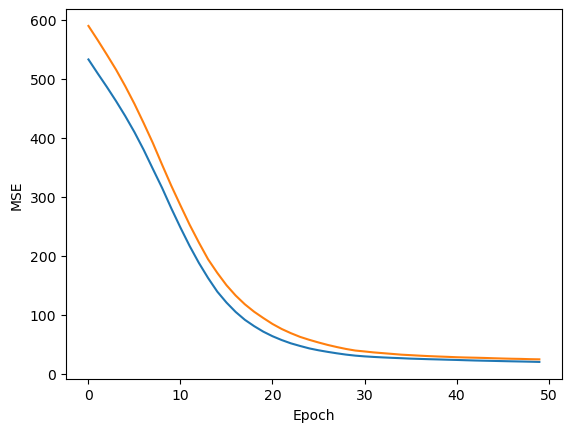

In [32]:
plt.plot(
    history.history['mse'],
    label='Train MSE' 
) 
plt.plot(
    history.history['val_mse'], 
    label='Validation MSE' 
) 
plt.ylabel("MSE") 
plt.xlabel("Epoch") 
plt.show()

In [35]:
X_1 = scaled_X_train[0].reshape(1, 13) 

pred_1 = model.predict(X_1) 

print("Prediction for first training observation: ", pred_1)

1/1 [==============================] - 0s 20ms/step
Prediction for first training observation:  [[15.115022]]


In [36]:
print("Actual y-value: ", y_train[0])

Actual y-value:  15.2


In [38]:
model.save("../models/tf_reg") 

INFO:tensorflow:Assets written to: ../models/tf_reg/assets


INFO:tensorflow:Assets written to: ../models/tf_reg/assets
